## Module 2: Exercises


For this module, your exercises will follow a similar trajectory to the practices notebook. However, instead of retrieving data from the `search/tweets` API, you will be asked to query data from the `search/users` API.

You may copy/paste any relevant code from the practice notebook below. This is mostly only relevant for the first question.

### 1. Write a function named `load_twitter_token` to load a Twitter token using the environment variable `TWITTER_PAT`. Then load the token and store it as an object named "token"

In [10]:
(token <- readRDS("data_sci_8001_token.rds"))

<Token>
<oauth_endpoint>
 request:   https://api.twitter.com/oauth/request_token
 authorize: https://api.twitter.com/oauth/authenticate
 access:    https://api.twitter.com/oauth/access_token
<oauth_app> data_sci_8001
  key:    nImVTaVIeo6tYlKnwYgxPRquQ
  secret: <hidden>
<credentials> oauth_token, oauth_token_secret, user_id, screen_name, x_auth_expires
---

In [11]:
## expand full path to token
path_to_token <- normalizePath("data_sci_8001_token.rds")

## create env variable TWITTER_PAT (with path to saved token)
envvar <- paste0("TWITTER_PAT=", path_to_token)

## save as .Renviron file (or append if the file already exists)
cat(envvar, file = "~/.Renviron", fill = TRUE, append = TRUE)

In [12]:
path_to_token

[1] "/dsa/home/mdsmr6/DSA-STREAMING_mdsmr6/modules/module2/exercises/data_sci_8001_token.rds"

In [13]:
envvar

[1] "TWITTER_PAT=/dsa/home/mdsmr6/DSA-STREAMING_mdsmr6/modules/module2/exercises/data_sci_8001_token.rds"

In [14]:
readRenviron("~/.Renviron")

In [15]:
## load token function
load_twitter_token <- function() {
    readRDS(Sys.getenv("TWITTER_PAT"))

}

## load token
token <- load_twitter_token()

## print token
token

<Token>
<oauth_endpoint>
 request:   https://api.twitter.com/oauth/request_token
 authorize: https://api.twitter.com/oauth/authenticate
 access:    https://api.twitter.com/oauth/access_token
<oauth_app> data_sci_8001
  key:    nImVTaVIeo6tYlKnwYgxPRquQ
  secret: <hidden>
<credentials> oauth_token, oauth_token_secret, user_id, screen_name, x_auth_expires
---

In [16]:
library(httr)

### 2. Write a function to query [Twitter's `users/search` API](https://developer.twitter.com/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-users-search). Make sure to parametricize any useful parameter variables. The function should return a response object with status code 200 (print using any method discussed in this module to show you've achieved this result). Test the function by searching for the keyword `rstats`.

In [17]:
## write function to query users/search API
search_tweeps <- function(q, page = NULL,
                           count = 100, 
                           include_entities = TRUE) {
    ## URL scheme and hostname
    base_url <- "https://api.twitter.com"
    ## include the API version number as part of the path
    path <- "1.1/users/search.json"
    


    ## continue function code here
     params <- list(
        q = q,
        tweet_mode = "extended"
)
    httr::GET(base_url, path=path, query=params,
               httr::config(token = load_twitter_token()))
}

In [18]:
## test function
usr <- search_tweeps("rstats")

In [20]:
## show (print) that usr's status code == 200
usr
print(paste("Status Code is ", usr$status_code))

Response [https://api.twitter.com/1.1/users/search.json?q=rstats&tweet_mode=extended]
  Date: 2018-02-07 05:35
  Status: 200
  Content-Type: application/json;charset=utf-8
  Size: 72 kB


[1] "Status Code is  200"


### 3. (a) Write a function, `response2list()` that will convert the response objects [from Twitter] into an R lists. Then (b) use `response2list()` on `usr`. Finally, (c) preview the structure down to 2 levels of the converted object down.

In [21]:
## 3a write response2list function
response2list <- function(x) {
    ## your function code goes in here
    js <- httr::content(usr, as = "text", encoding ="UTF-8")
    d<-jsonlite::fromJSON(js)
}

## 3b convert response object to R list
usr <- response2list(usr)

## 3c print usr preview 2 levels down
str(usr,2)

'data.frame':	20 obs. of  43 variables:
 $ id                                : num  2.97e+09 3.42e+08 2.95e+08 4.62e+07 5.69e+06 ...
 $ id_str                            : chr  "2973406683" "342250615" "295344317" "46245868" ...
 $ name                              : chr  "Mike Kearney<U+0001F4CA>" "rOpenSci" "One R Tip a Day" "David Robinson" ...
 $ screen_name                       : chr  "kearneymw" "rOpenSci" "RLangTip" "drob" ...
 $ location                          : chr  "Columbia, MO" "Berkeley, Portland, Kamloops, Utrecht" "" "New York, NY" ...
 $ description                       : chr  "Assistant Professor at @mujschool and MU Informatics Institute. Interested in new media, partisanship, data jou"| __truncated__ "rOpenSci develops #rstats-based tools to facilitate open science and access to open data. Tweets by @sckottie, "| __truncated__ "One tip per day M-F on the R programming language #rstats. Brought to you by the R community team at Microsoft." "Chief Data Scientist at

### 4. Create a data frame `usr_atomic` which consists of only non-recursive variables. Print the first 6 rows of the data frame.

In [22]:
sapply(usr,is.atomic)

id                             id_str 
                              TRUE                               TRUE 
                              name                        screen_name 
                              TRUE                               TRUE 
                          location                        description 
                              TRUE                               TRUE 
                               url                           entities 
                              TRUE                              FALSE 
                         protected                    followers_count 
                              TRUE                               TRUE 
                     friends_count                       listed_count 
                              TRUE                               TRUE 
                        created_at                   favourites_count 
                              TRUE                               TRUE 
                        utc_offset                          time_zone 
                              TRUE                               TRUE 
                       geo_enabled                           verified 
                              TRUE                               TRUE 
                    statuses_count                               lang 
                              TRUE                               TRUE 
                            status               contributors_enabled 
                             FALSE                               TRUE 
                     is_translator             is_translation_enabled 
                              TRUE                               TRUE 
          profile_background_color       profile_background_image_url 
                              TRUE                               TRUE 
profile_background_image_url_https            profile_background_tile 
                              TRUE                               TRUE 
                 profile_image_url            profile_image_url_https 
                              TRUE                               TRUE 
                profile_banner_url                 profile_link_color 
                              TRUE                               TRUE 
      profile_sidebar_border_color         profile_sidebar_fill_color 
                              TRUE                               TRUE 
                profile_text_color       profile_use_background_image 
                              TRUE                               TRUE 
              has_extended_profile                    default_profile 
                              TRUE                               TRUE 
             default_profile_image                          following 
                              TRUE                               TRUE 
               follow_request_sent                      notifications 
                              TRUE                               TRUE 
                   translator_type 
                              TRUE

In [23]:
## uncomment and complete this code
usr_atomic <- usr[ -c(8,21)]

In [24]:
sapply(usr_atomic,is.atomic)

id                             id_str 
                              TRUE                               TRUE 
                              name                        screen_name 
                              TRUE                               TRUE 
                          location                        description 
                              TRUE                               TRUE 
                               url                          protected 
                              TRUE                               TRUE 
                   followers_count                      friends_count 
                              TRUE                               TRUE 
                      listed_count                         created_at 
                              TRUE                               TRUE 
                  favourites_count                         utc_offset 
                              TRUE                               TRUE 
                         time_zone                        geo_enabled 
                              TRUE                               TRUE 
                          verified                     statuses_count 
                              TRUE                               TRUE 
                              lang               contributors_enabled 
                              TRUE                               TRUE 
                     is_translator             is_translation_enabled 
                              TRUE                               TRUE 
          profile_background_color       profile_background_image_url 
                              TRUE                               TRUE 
profile_background_image_url_https            profile_background_tile 
                              TRUE                               TRUE 
                 profile_image_url            profile_image_url_https 
                              TRUE                               TRUE 
                profile_banner_url                 profile_link_color 
                              TRUE                               TRUE 
      profile_sidebar_border_color         profile_sidebar_fill_color 
                              TRUE                               TRUE 
                profile_text_color       profile_use_background_image 
                              TRUE                               TRUE 
              has_extended_profile                    default_profile 
                              TRUE                               TRUE 
             default_profile_image                          following 
                              TRUE                               TRUE 
               follow_request_sent                      notifications 
                              TRUE                               TRUE 
                   translator_type 
                              TRUE

### 5. Now create a data frame `usr_recurs` using only recursive variables. Preview the structure of the data frame, down to the second level.

In [25]:
## uncomment and complete this code
usr_recurs <- usr[c(8,21)]

In [26]:
sapply(usr_recurs,is.recursive)

entities   status 
    TRUE     TRUE

# ***NOTE***: use `usr_atomic` for all remaining questions.

### 6. Add a new variable, `last_tweet`, to the data frame of non-recursive variables [from question #4) that indicates the most recent tweet posted by a user. Use the `convert2posixct()` function to make sure `last_tweet` is of class `POSIXct`.

In [27]:
## function for converting characters to date times
convert2posixct <- function(x) {
    as.POSIXct(x, format = "%a %b %d %T %z %Y")
}

## convert to posixct and add status created_at as new variable named `last_tweet`
usr_atomic$last_tweet <- convert2posixct(usr_atomic$created_at)
head(usr_atomic,2)

id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,⋯,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,last_tweet
2973406683,2973406683,Mike Kearney<U+0001F4CA>,kearneymw,"Columbia, MO","Assistant Professor at @mujschool and MU Informatics Institute. Interested in new media, partisanship, data journalism, data[[""big""]] science, and #rstats.",https://t.co/wBaqsHTMcW,FALSE,3347,980,,333333,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,none,2015-01-11 11:54:09
342250615,342250615,rOpenSci,rOpenSci,"Berkeley, Portland, Kamloops, Utrecht","rOpenSci develops #rstats-based tools to facilitate open science and access to open data. Tweets by @sckottie, @_inundata, @StefanieButland, @opencpu",https://t.co/Ijujhl8x1E,FALSE,17001,509,,333333,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,none,2011-07-25 13:24:54


### 7. Use the `convert2posixct()` again to convert the `created_at` (user origin date-time) variable to POSIXct. Then, calculate the number of weeks since the users joined twitter (hint: use the `Sys.time()` function to get the current date-time, and `as.numeric` to convert time-diff values to "weeks").

In [29]:
## convert created_at to class date-time
usr_atomic$created_at <- convert2posixct(usr_atomic$created_at)

## create `weeks_joined` variable and add it to `usr_atomic`
usr_atomic$weeks_joined <- as.numeric(Sys.time() -usr_atomic$created_at)/7
head(usr_atomic,2)

id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,⋯,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,last_tweet,weeks_joined
2973406683,2973406683,Mike Kearney<U+0001F4CA>,kearneymw,"Columbia, MO","Assistant Professor at @mujschool and MU Informatics Institute. Interested in new media, partisanship, data journalism, data[[""big""]] science, and #rstats.",https://t.co/wBaqsHTMcW,FALSE,3347,980,,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,none,2015-01-11 11:54:09,160.3557
342250615,342250615,rOpenSci,rOpenSci,"Berkeley, Portland, Kamloops, Utrecht","rOpenSci develops #rstats-based tools to facilitate open science and access to open data. Tweets by @sckottie, @_inundata, @StefanieButland, @opencpu",https://t.co/Ijujhl8x1E,FALSE,17001,509,,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,none,2011-07-25 13:24:54,341.2098


For the next question, it's not a bad idea to load the tidyverse packages.

In [32]:
## load the tidyverse packages (dplyr, tidyr, ggplot2)
library(tidyverse)

### 8. Using ggplot2, plot the densities, i.e., `geom_density()`, of `statuses_count`, `friends_count`, and `followers_count` variables. (HINT: `select()` variables and then `tidyr::gather()` to convert data to long-form; it's more ggplot2 friendly).

In [33]:
## wrangle and plot using `geom_density()`
varCol<-usr_atomic %>%
select(statuses_count, friends_count, followers_count)

In [34]:
head(varCol,2)

statuses_count,friends_count,followers_count
3264,980,3347
3941,509,17001


In [36]:
singleCol<-gather(varCol,"Categories","Amount",1:3)
head(singleCol)

Categories,Amount
statuses_count,3264
statuses_count,3941
statuses_count,1829
statuses_count,8133
statuses_count,71826
statuses_count,2089


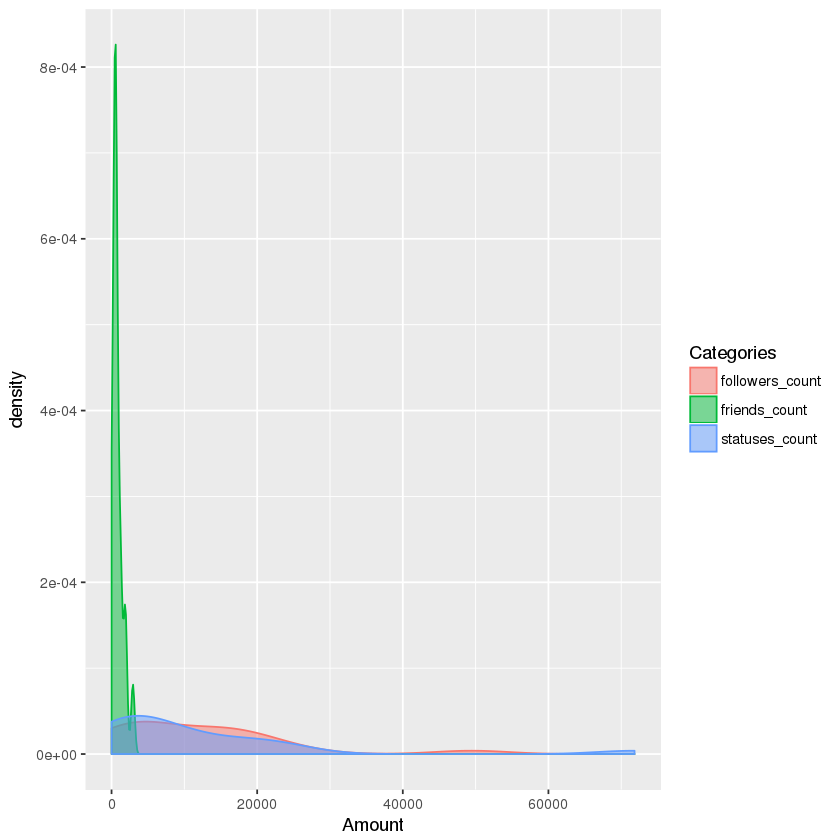

In [37]:
ggplot(singleCol, aes(x=Amount))+ geom_density(aes(group=Categories,color=Categories,fill=Categories),alpha=.5)

### 9. Plot the histograms a second time, only this time `log()` the variables.

In [38]:
## wrangle, log variables, and plot using `geom_density()`
singleCol$logAmount<-log(singleCol$Amount)
head(singleCol)

Categories,Amount,logAmount
statuses_count,3264,8.090709
statuses_count,3941,8.279190
statuses_count,1829,7.511525
statuses_count,8133,9.003685
statuses_count,71826,11.182002
statuses_count,2089,7.644441


In [39]:
logCol<-singleCol

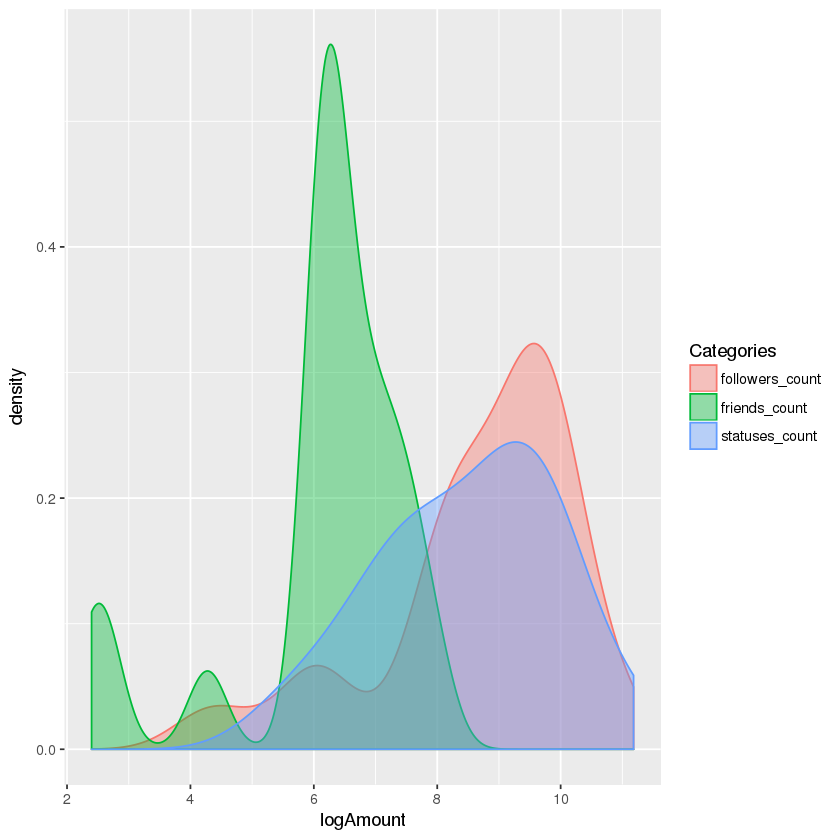

In [40]:
ggplot(logCol, aes(x=logAmount))+geom_density(aes(group=Categories,color=Categories,fill=Categories),alpha=.4)

### 10. Finally, use a generalized linear model `glm()` to model `statuses_count` using `followers_count`, `friends_count`, `verified`, `weeks_joined`, and `last_tweet` as predictors. Print the summary of the model output.

In [41]:
## your code goes here
glm<-glm(statuses_count ~ followers_count+friends_count+verified+weeks_joined+last_tweet,
        usr_atomic,
        family=poisson)

In [42]:
summary(glm)


Call:
glm(formula = statuses_count ~ followers_count + friends_count + 
    verified + weeks_joined + last_tweet, family = poisson, data = usr_atomic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-237.57   -86.75   -14.88    54.36   237.38  

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     7.571e+00  9.521e-03  795.20   <2e-16 ***
followers_count 1.002e-05  2.243e-07   44.67   <2e-16 ***
friends_count   4.738e-04  2.926e-06  161.93   <2e-16 ***
verifiedTRUE    8.081e-01  5.080e-03  159.09   <2e-16 ***
weeks_joined    2.635e-03  1.739e-05  151.48   <2e-16 ***
last_tweet             NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 300097  on 19  degrees of freedom
Residual deviance: 202459  on 15  degrees of freedom
AIC: 202676

Number of Fisher Scoring ite